<a href="https://colab.research.google.com/github/adiazoq/Proyecto-Machine-Learning/blob/main/C%C3%B3digos/DESCRIPTIVO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [ ]:
# Leer base de datos de excel
from google.colab import files
uploaded = files.upload()
!ls

Saving df_limpiado.xlsx to df_limpiado.xlsx
df_limpiado.xlsx  sample_data


In [ ]:
# Cargar el archivo Excel
df = pd.read_excel('df_limpiado.xlsx')

Primeras filas del dataframe:
   CodigoEstacion  CodigoSensor         FechaObservacion          Dia   Año  \
0        28035060            68  2006 abr 01 03:00:00 AM  2006 abr 01  2006   
1        28035070            68  2006 abr 01 02:00:00 PM  2006 abr 01  2006   
2        28035070            68  2006 abr 01 04:00:00 AM  2006 abr 01  2006   
3        28035060            68  2006 abr 01 07:00:00 AM  2006 abr 01  2006   
4        28035070            68  2006 abr 01 01:00:00 PM  2006 abr 01  2006   

     Mes  ValorObservado   NombreEstacion Departamento   Municipio  \
0  abril           25.10  FEDEARROZ - AUT        CESAR  VALLEDUPAR   
1  abril           24.60  GUATAPURI - AUT        CESAR  VALLEDUPAR   
2  abril           26.96  GUATAPURI - AUT        CESAR  VALLEDUPAR   
3  abril           25.80  FEDEARROZ - AUT        CESAR  VALLEDUPAR   
4  abril           26.50  GUATAPURI - AUT        CESAR  VALLEDUPAR   

  ZonaHidrografica    Latitud   Longitud DescripcionSensor UnidadMedida  


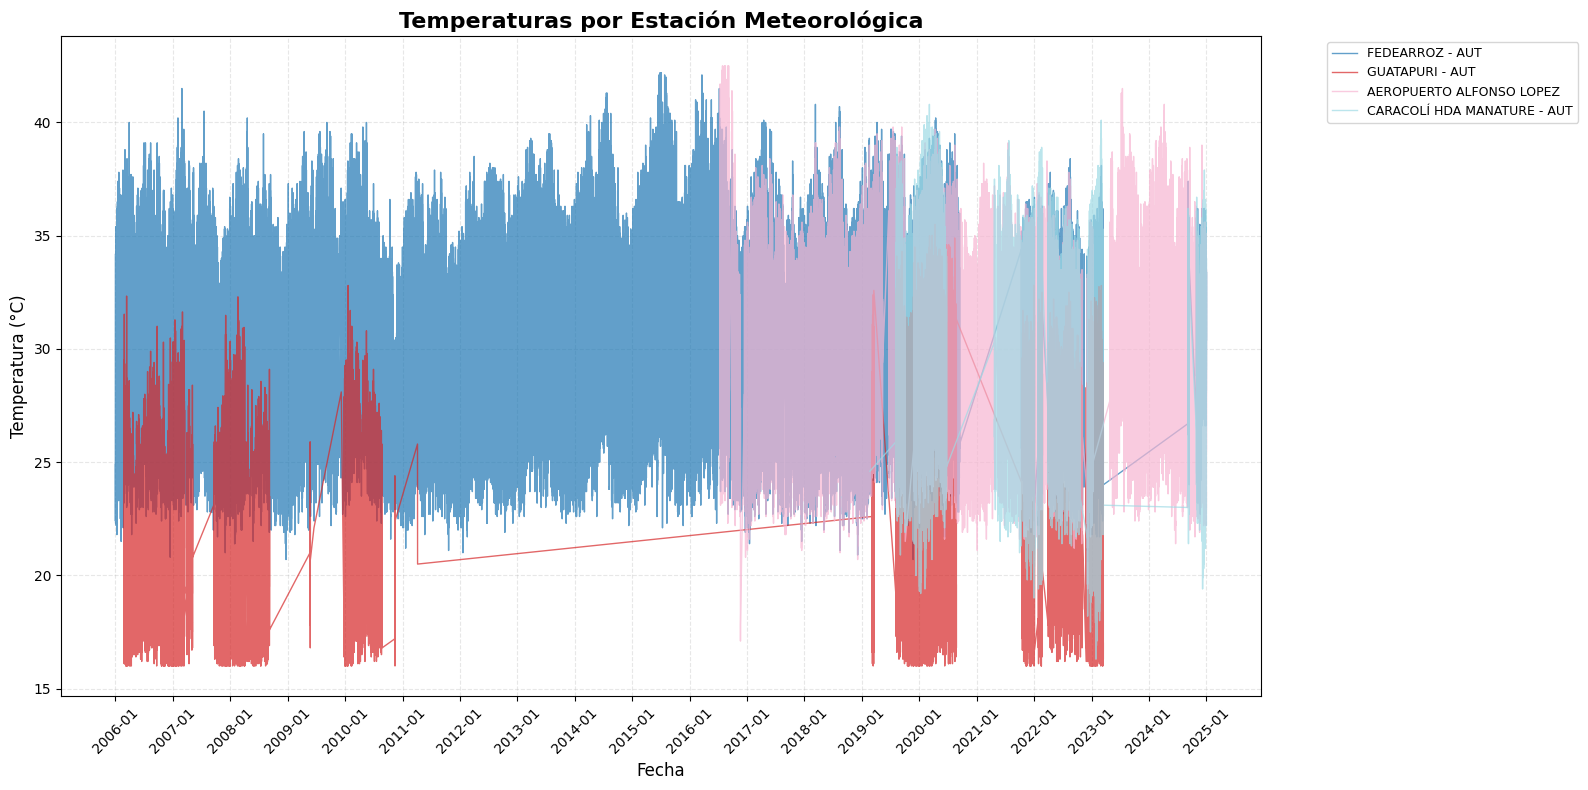

In [ ]:

# Ver las primeras filas para entender la estructura
print("Primeras filas del dataframe:")
print(df.head())
print("\nInformación del dataframe:")
print(df.info())
print("\nEstaciones disponibles:")
print(df['NombreEstacion'].unique())

# Convertir la columna de fecha a datetime
# El formato parece ser: '2006 abr 01 03:00:00 AM'
# Primero, normalizamos los nombres de meses en español a inglés
meses_espanol = {
    'ene': 'jan', 'feb': 'feb', 'mar': 'mar', 'abr': 'apr',
    'may': 'may', 'jun': 'jun', 'jul': 'jul', 'ago': 'aug',
    'sep': 'sep', 'oct': 'oct', 'nov': 'nov', 'dic': 'dec'
}

def convertir_fecha(fecha_str):
    try:
        # Si ya es datetime, retornarlo
        if isinstance(fecha_str, datetime):
            return fecha_str

        # Convertir a string si no lo es
        fecha_str = str(fecha_str)

        # Reemplazar meses en español
        for mes_es, mes_en in meses_espanol.items():
            if mes_es in fecha_str.lower():
                fecha_str = fecha_str.lower().replace(mes_es, mes_en)
                break

        # Convertir a datetime
        return pd.to_datetime(fecha_str, format='%Y %b %d %I:%M:%S %p', errors='coerce')
    except:
        return pd.NaT

# Aplicar la conversión
df['FechaObservacion'] = df['FechaObservacion'].apply(convertir_fecha)

# Verificar que las fechas se convirtieron correctamente
print("\nVerificación de fechas:")
print(f"Fechas nulas: {df['FechaObservacion'].isnull().sum()}")
print(f"Rango de fechas: {df['FechaObservacion'].min()} a {df['FechaObservacion'].max()}")

# Filtrar valores nulos si los hay
df = df.dropna(subset=['FechaObservacion', 'ValorObservado'])

# Opción 1: Gráfico de líneas múltiples por estación

# Crear figura
plt.figure(figsize=(16, 8))

# Obtener lista de estaciones únicas
estaciones = df['NombreEstacion'].unique()
print(f"\nTotal de estaciones: {len(estaciones)}")

# Crear un color para cada estación
colores = plt.cm.tab20(np.linspace(0, 1, len(estaciones)))

# Gráfico 1: Todas las estaciones juntas
for i, estacion in enumerate(estaciones):
    # Filtrar datos por estación
    df_estacion = df[df['NombreEstacion'] == estacion].copy()

    # Ordenar por fecha
    df_estacion = df_estacion.sort_values('FechaObservacion')

    # Graficar
    plt.plot(df_estacion['FechaObservacion'],
             df_estacion['ValorObservado'],
             label=estacion,
             linewidth=1,
             alpha=0.7,
             color=colores[i])

# Personalizar el gráfico
plt.title('Temperaturas por Estación Meteorológica', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Formatear eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Añadir leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()

plt.show()


Convirtiendo fechas...
Fechas convertidas correctamente: 636445/636445
Fechas nulas: 0

Datos válidos después de filtrar: 636445 filas

Estaciones encontradas (4):
1. FEDEARROZ - AUT
2. GUATAPURI - AUT
3. AEROPUERTO ALFONSO LOPEZ
4. CARACOLÍ HDA MANATURE - AUT

Calculando promedios diarios por estación...
  FEDEARROZ - AUT: 5757 días, 134729 registros horarios
  GUATAPURI - AUT: 1769 días, 38292 registros horarios
  AEROPUERTO ALFONSO LOPEZ: 2733 días, 439757 registros horarios
  CARACOLÍ HDA MANATURE - AUT: 935 días, 23667 registros horarios

DataFrame de promedios diarios creado: 11194 filas


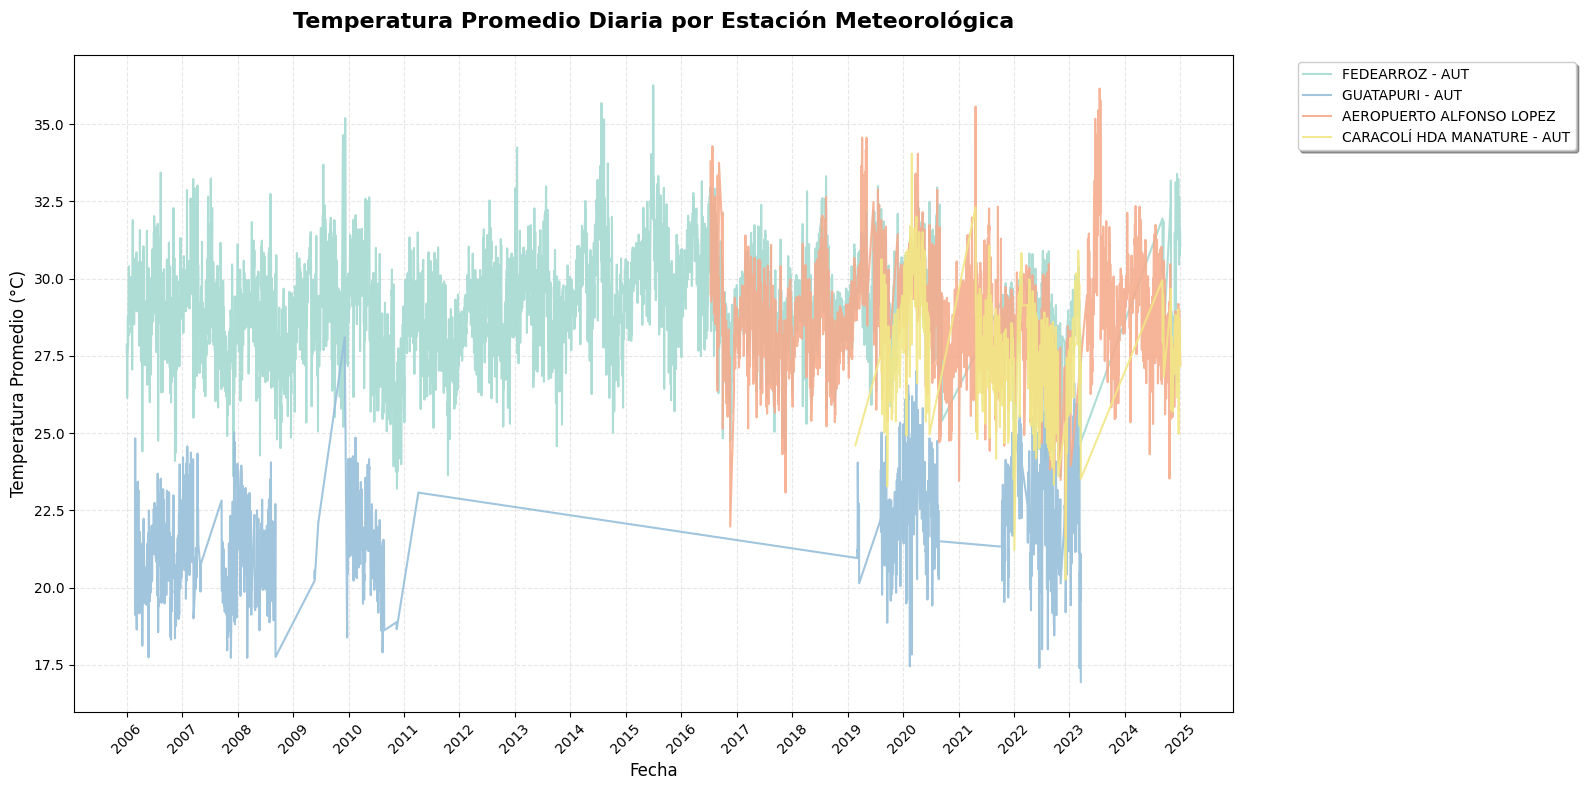

In [ ]:
# Función para convertir fechas
meses_espanol = {
    'ene': 'jan', 'feb': 'feb', 'mar': 'mar', 'abr': 'apr',
    'may': 'may', 'jun': 'jun', 'jul': 'jul', 'ago': 'aug',
    'sep': 'sep', 'oct': 'oct', 'nov': 'nov', 'dic': 'dec'
}

def convertir_fecha(fecha_str):
    try:
        if isinstance(fecha_str, datetime):
            return fecha_str

        fecha_str = str(fecha_str).lower()

        for mes_es, mes_en in meses_espanol.items():
            if mes_es in fecha_str:
                fecha_str = fecha_str.replace(mes_es, mes_en)
                break

        return pd.to_datetime(fecha_str, format='%Y %b %d %I:%M:%S %p', errors='coerce')
    except:
        try:
            # Intentar conversión directa
            return pd.to_datetime(fecha_str, errors='coerce')
        except:
            return pd.NaT

# Convertir fechas
print("\nConvirtiendo fechas...")
df['FechaObservacion'] = df['FechaObservacion'].apply(convertir_fecha)

# Verificar conversión
fechas_nulas = df['FechaObservacion'].isnull().sum()
print(f"Fechas convertidas correctamente: {len(df) - fechas_nulas}/{len(df)}")
print(f"Fechas nulas: {fechas_nulas}")

# Filtrar datos válidos
df = df.dropna(subset=['FechaObservacion', 'ValorObservado'])
print(f"\nDatos válidos después de filtrar: {len(df)} filas")

# Crear columnas de fecha y año-mes-dia
df['Fecha'] = df['FechaObservacion'].dt.date
df['Fecha_dt'] = pd.to_datetime(df['Fecha'])
df['Anio'] = df['FechaObservacion'].dt.year
df['Mes'] = df['FechaObservacion'].dt.month
df['Dia'] = df['FechaObservacion'].dt.day

# Lista de estaciones
estaciones = df['NombreEstacion'].unique()
print(f"\nEstaciones encontradas ({len(estaciones)}):")
for i, estacion in enumerate(estaciones):
    print(f"{i+1}. {estacion}")

# ============================================================================
# CALCULAR PROMEDIO DIARIO POR ESTACIÓN
# ============================================================================

print("\nCalculando promedios diarios por estación...")

# Crear dataframe para promedios diarios
promedios_diarios = []

for estacion in estaciones:
    df_estacion = df[df['NombreEstacion'] == estacion].copy()

    # Calcular promedio diario
    promedio_diario = df_estacion.groupby('Fecha')['ValorObservado'].agg([
        ('Temperatura', 'mean'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Num_Registros', 'count')
    ]).reset_index()

    promedio_diario['Fecha'] = pd.to_datetime(promedio_diario['Fecha'])
    promedio_diario['Estacion'] = estacion

    promedios_diarios.append(promedio_diario)

    print(f"  {estacion}: {len(promedio_diario)} días, {df_estacion['ValorObservado'].count()} registros horarios")

# Combinar todos los promedios
df_promedio_diario = pd.concat(promedios_diarios, ignore_index=True)

print(f"\nDataFrame de promedios diarios creado: {len(df_promedio_diario)} filas")

# ============================================================================
# GRÁFICO 1: PROMEDIOS DIARIOS POR ESTACIÓN (TODAS JUNTAS) - CON COLORES PERSONALIZADOS
# ============================================================================

plt.figure(figsize=(16, 8))

# COLORES PERSONALIZADOS PARA 4 ESTACIONES
# Puedes cambiar estos colores según tus preferencias

# Opción 1: Colores sólidos vibrantes
#colores_estaciones = {
 #   'FEDEARROZ - AUT': '#FF6B6B',      # Rojo coral
  #  'GUATAPURI - AUT': '#58E8BA',      # Turquesa
   # 'AEROPUERTO ALFONSO LOPEZ': '#45B7D1',  # Azul celeste
    #'CARACOLÍ HDA MANATURE - AUT': '#F59827'  # Verde menta
#}

#Opción 2: Colores más suaves (alternativa)
colores_estaciones = {
   'FEDEARROZ - AUT': '#a5dad2',      # Rojo
   'GUATAPURI - AUT': '#97bfda',      # Azul
   'AEROPUERTO ALFONSO LOPEZ': '#F5AC8E',  # Verde
   'CARACOLÍ HDA MANATURE - AUT': '#f2e786'  # Naranja
}

# Opción 3: Colores tipo matplotlib default (alternativa)
# colores_estaciones = {
#     'FEDEARROZ - AUT': 'tab:blue',
#     'GUATAPURI - AUT': 'tab:orange',
#     'AEROPUERTO ALFONSO LOPEZ': 'tab:green',
#     'CARACOLÍ HDA MANATURE - AUT': 'tab:red'
# }

# Verificar que tenemos colores para todas las estaciones
for estacion in estaciones:
    if estacion not in colores_estaciones:
        print(f"Advertencia: No hay color definido para la estación: {estacion}")
        # Asignar un color por defecto
        colores_estaciones[estacion] = '#808080'  # Gris por defecto

# Crear el gráfico con colores personalizados
for i, estacion in enumerate(estaciones):
    df_estacion = df_promedio_diario[df_promedio_diario['Estacion'] == estacion].copy()
    df_estacion = df_estacion.sort_values('Fecha')

    # Obtener color personalizado para esta estación
    color_estacion = colores_estaciones[estacion]

    # Graficar promedio diario
    plt.plot(df_estacion['Fecha'],
             df_estacion['Temperatura'],
             label=estacion,
             linewidth=1.5,  # Un poco más grueso para mejor visibilidad
             alpha=0.9,      # Menos transparente
             color=color_estacion,
             marker='',      # Sin marcadores para líneas más limpias
             markersize=0)

# Personalizar gráfico
plt.title('Temperatura Promedio Diaria por Estación Meteorológica',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Temperatura Promedio (°C)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Formatear eje X
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

# Añadir leyenda con colores correspondientes
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10,
                    frameon=True, fancybox=True, shadow=True, borderpad=1)

# Mejorar la legibilidad de la leyenda
for text in legend.get_texts():
    text.set_fontweight('bold')

# Añadir línea de referencia del promedio general (opcional)
#promedio_general = df_promedio_diario['Temperatura'].mean()
#plt.axhline(y=promedio_general, color='black', linestyle=':', alpha=0.7,
            #linewidth=1.2, label=f'Promedio General: {promedio_general:.1f}°C')

# Actualizar leyenda para incluir la línea de promedio
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10,
           frameon=True, fancybox=True, shadow=True)

plt.tight_layout()

# Guardar el gráfico (opcional)
# plt.savefig('temperatura_estaciones_colores_personalizados.png', dpi=300, bbox_inches='tight')

plt.show()